### Effects of Random Vs Zero Initilization on NN Learning
In this experiment I have implemented a very basic FEED FORWARD NN with 2 possible scenerios:
1) Where the weights are initialized to "zero"
2) Where  the weights are initialized "randomly"
3) After that I have trained the model for both scenerios.
4) And lastly I have plotted the results to see how learning fails when initialzed to zero while the learning occurs effectively when initilized randomly.
5) Generated a comparative analysis report at the end

In [1]:
import numpy as npy                 #for calculations
import matplotlib.pyplot as pplt     #for plotting

# DATASET(XOR)

In [2]:
#iNPUTS FOR XOR
X= npy.array([[0,0],
              [1,0],
              [0,1],
              [1,1]])  




#labels/outputs for XOR          
y=npy.array([[0],
             [1],
             [1],
             [0]])                  


# Setting my_seed 

In [3]:
my_seed=45
npy.random.seed(my_seed)   #smooth performance good practice for problem statemnet

# Sigmoid Function

In [4]:
def Sigmoid_Activation_Func(a):
    return 1 / (1 + npy.exp(-a))           

# Sigmoid Derivative Function

In [5]:
def Sigmoid_Derivative_Func(a):
    return Sigmoid_Activation_Func(a) * (1-Sigmoid_Activation_Func(a)) 

# LOSS  Function 

In [6]:

def loss_func(actual_label,target_label):
    epsilon_value= 1e-8
    #formula for entropy
    cross_entropy_formula=actual_label * npy.log(target_label + epsilon_value) + \
          (1 - actual_label) * npy.log(1 - target_label + epsilon_value)
    #mean of entropy
    mean_loss=-npy.mean(cross_entropy_formula)
    return mean_loss
    

# AccuraCy Fuction

In [7]:
def accuracy_func(actual_label, target_label):
    #convert the probabilities to 0 or 1
    predictions=target_label >= 0.5
    #accuarcy measure
    accuracy=npy.mean(predictions==actual_label)
    return accuracy

# Feedforward Neural Network


In [8]:
class FeedForward_NN:
    def __init__(self, input_neurons, hidden_neurons, output_neurons, init_method):

        #CASE 1 : INITIALIZE ALL TO 0
        # doesn't learn anything

        if init_method == "zero":
            self.W1 = npy.zeros((input_neurons, hidden_neurons))
            self.B1 = npy.zeros((1, hidden_neurons))
            self.W2 = npy.zeros((hidden_neurons, output_neurons))
            self.B2 = npy.zeros((1, output_neurons))

        #CASE 2: INITIALIZE RANDOMLY
        # Use -0.5 , 0.5 from problem statement by teacher for uniform distribution

        elif init_method == "random":
            # Random initialization: values between -0.5 and 0.5 (small numbers helps uniformity)

            self.W1 = npy.random.uniform(-0.5, 0.5, (input_neurons, hidden_neurons))
            self.B1 = npy.random.uniform(-0.5, 0.5, (1, hidden_neurons))
            self.W2 = npy.random.uniform(-0.5, 0.5, (hidden_neurons, output_neurons))
            self.B2 = npy.random.uniform(-0.5, 0.5, (1, output_neurons))
        else:
            raise ValueError("INITIALIZATION FAILED. Choose like 'zero' or 'random' ")
        



        # FOWARED PROPAGATION

    def Forward_Prop(self, X):
        self.Z1 = npy.dot(X, self.W1) + self.B1
        self.A1 = Sigmoid_Activation_Func(self.Z1)

        self.Z2 = npy.dot(self.A1, self.W2) + self.B2
        self.A2 = Sigmoid_Activation_Func(self.Z2)


        return self.A2
    
            
        #BACKWARD PROPAGATION

    def Back_Prop(self, X, y, learning_rate):
        # Step 1: Error at output
        error_output = self.A2 - y

        # Step 2: Gradients for output layer
        dZ2 = error_output * Sigmoid_Derivative_Func(self.Z2)

        # Step 3: Error for hidden layer
        d_hidden = npy.dot(dZ2, self.W2.T)
        dZ1 = d_hidden * Sigmoid_Derivative_Func(self.Z1)

        # Step 4: Compute gradients
        dW2 = npy.dot(self.A1.T, dZ2)
        dB2 = npy.sum(dZ2, axis=0, keepdims=True)

        dW1 = npy.dot(X.T, dZ1)
        dB1 = npy.sum(dZ1, axis=0, keepdims=True)

        # Step 5: Update weights and biases
        self.W1 -= learning_rate * dW1
        self.B1 -= learning_rate * dB1
        self.W2 -= learning_rate * dW2
        self.B2 -= learning_rate * dB2

        
    


# TRAIN Function


In [9]:
def train_model(init_method, epochs=10000, learning_rate=0.1):
    model = FeedForward_NN(input_neurons=2, hidden_neurons=4, output_neurons=1, init_method=init_method)
    
    losses=[]
    accs = []

    for epoch in range(epochs):
        output = model.Forward_Prop(X)
        loss = loss_func(y, output)
        acc = accuracy_func(y, output)

        model.Back_Prop(X, y, learning_rate)

        losses.append(loss)
        accs.append(acc)

        if epoch % 1000 == 0:
            print(f"[{init_method.upper()} INIT] Epoch {epoch}: Loss = {loss:.4f}, Accuracy = {acc:.4f}")

    return losses, accs


### TRAINING FOR CASE 1 (init_method="zero")

In [10]:
loss_zero, acc_zero = train_model(init_method="zero")

[ZERO INIT] Epoch 0: Loss = 0.6931, Accuracy = 0.5000
[ZERO INIT] Epoch 1000: Loss = 0.6931, Accuracy = 0.5000
[ZERO INIT] Epoch 2000: Loss = 0.6931, Accuracy = 0.5000
[ZERO INIT] Epoch 3000: Loss = 0.6931, Accuracy = 0.5000
[ZERO INIT] Epoch 4000: Loss = 0.6931, Accuracy = 0.5000
[ZERO INIT] Epoch 5000: Loss = 0.6931, Accuracy = 0.5000
[ZERO INIT] Epoch 6000: Loss = 0.6931, Accuracy = 0.5000
[ZERO INIT] Epoch 7000: Loss = 0.6931, Accuracy = 0.5000
[ZERO INIT] Epoch 8000: Loss = 0.6931, Accuracy = 0.5000
[ZERO INIT] Epoch 9000: Loss = 0.6931, Accuracy = 0.5000


### TRAINING FOR CASE 2 (init_method="random")

In [11]:
loss_random, acc_random = train_model(init_method="random")

[RANDOM INIT] Epoch 0: Loss = 0.7449, Accuracy = 0.5000
[RANDOM INIT] Epoch 1000: Loss = 0.6929, Accuracy = 0.5000
[RANDOM INIT] Epoch 2000: Loss = 0.6917, Accuracy = 0.5000
[RANDOM INIT] Epoch 3000: Loss = 0.6786, Accuracy = 0.7500
[RANDOM INIT] Epoch 4000: Loss = 0.5845, Accuracy = 0.7500
[RANDOM INIT] Epoch 5000: Loss = 0.4039, Accuracy = 1.0000
[RANDOM INIT] Epoch 6000: Loss = 0.1997, Accuracy = 1.0000
[RANDOM INIT] Epoch 7000: Loss = 0.1228, Accuracy = 1.0000
[RANDOM INIT] Epoch 8000: Loss = 0.0911, Accuracy = 1.0000
[RANDOM INIT] Epoch 9000: Loss = 0.0741, Accuracy = 1.0000


### PLOT FOR LOSS VS EPOCHS

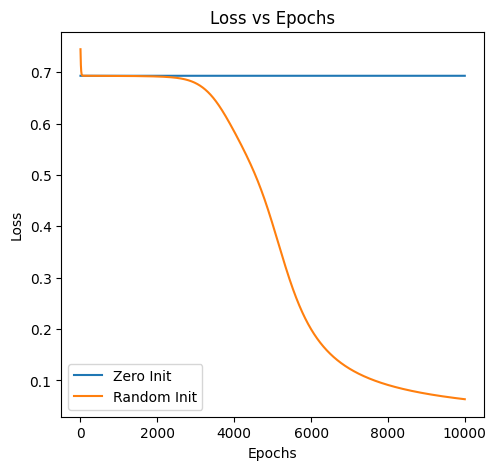

In [12]:
epochs = range(len(loss_zero))

pplt.figure(figsize=(12,5))

# Loss Plot
pplt.subplot(1, 2, 1)
pplt.plot(epochs, loss_zero, label="Zero Init")
pplt.plot(epochs, loss_random, label="Random Init")
pplt.title("Loss vs Epochs")
pplt.xlabel("Epochs")
pplt.ylabel("Loss")
pplt.legend()

### PLOT FOR ACCURACY VS EPOCH 

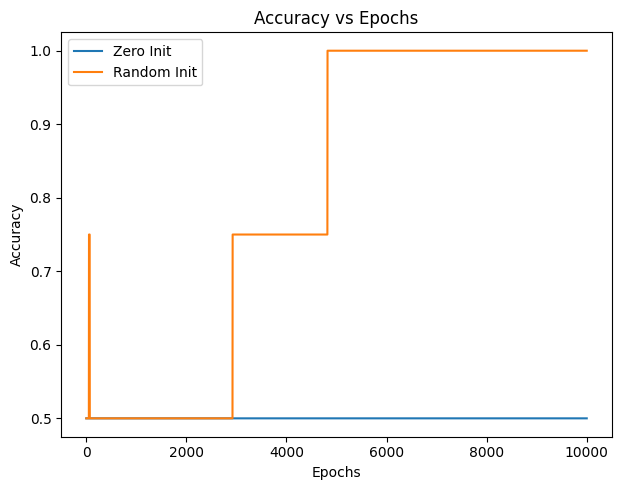

In [13]:
epochs = range(len(loss_zero))

pplt.figure(figsize=(12,5))

# Accuracy Plot
pplt.subplot(1, 2, 2)
pplt.plot(epochs, acc_zero, label="Zero Init")
pplt.plot(epochs, acc_random, label="Random Init")
pplt.title("Accuracy vs Epochs")
pplt.xlabel("Epochs")
pplt.ylabel("Accuracy")
pplt.legend()

pplt.tight_layout()
pplt.show()

## SHORT COMPARATIVE ANALYSIS



 Clearly from the plotting we can see the CASE 2 where we initialized to "RANDOM" has converged much faster and reached an accuracy of around 100 % while if we take a look at the plot for CASE 1 , where we initialized to "ZERO", it hasn't converged at all.Also when we trained for both CASES, CASE 2 is the clear winner which reached an accuracy close to 100 i.e 0.75 at epoch 4000 while as soon as it reached the epoch 5000 it acheicved an accuracy of 1.00 which is a 100%.

 When we initialize the feedforward NN to zero , no symmetery is broken at all, the output from all neurons in a layer is same,the grAdient for all neurons during backward propagation is same,there is no weights updation at all and there is no diversity in learning WHICH DEFEATS THE OVERALL MOTIVE OF HAVING MULTIPLE NUERONS & THE MODEL DOESN'T LEARN ANYTHING AT ALL.
 While on  the other hand in CASE 2, when we initialize the weights randomly,what really happens is that THE SYMMETERY GETS BROKEN, the output of all neurons of the same layer varies now,there is a gradient convergence for all neurons based on what weight was initialized to them randomly,CLEAR weight updation occurs and MODEL IS ABLE TO EFFECTIVELY LEARN which is the primary motive or use of models in real life.





